### request 사용법

In [1]:
# 서버에 페이지 정보를 요청할 때 사용하는 라이브러리
import requests as req

In [2]:
url = "https://www.naver.com/"
res = req.get(url)
# response[200] 잘 응답되었습니다.

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
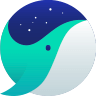
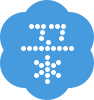

In [3]:
# 요청한 정보의 페이지를 보기
res.text

# Melon 홈페이지 정보 가져오기

In [4]:
m_url = "https://www.melon.com/"
res = req.get(m_url)
# 406 => 요청을 거부했다.

In [5]:
res

<Response [406]>

In [6]:
# 컴퓨터가 아닌 사람으로 속이는 작업(headers)
h = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"}

In [7]:
res = req.get(m_url, headers = h)

In [8]:
res

<Response [200]>

In [9]:
res.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>Melon::음악이 필요한 순간, 멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1"/>\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론"/>\r\n\t<meta property="og:url" content="http://www.melon.com/"/>\r\n\t<meta pro

# BeautifulSoup
--가져온 데이터에서 내가 원하는 내용만 추출할 때 사용

In [10]:
!pip install beautifulsoup4

In [11]:
from bs4 import BeautifulSoup as bs

In [12]:
#bs(어떤걸 가공할건지 , 어떻게 가공할건지 - 파싱방법)
soup = bs(res.text, 'lxml')

In [13]:
# find_all = 특정 데이터를 모두 찾아오는 기능(태그, 클래스/아이디)
result = soup.find_all('a', class_ = 'nav') # 숲에서 찾기

In [14]:
#result

In [15]:
#result[2] # 인덱스 2번

In [16]:
#result[2].text #text하면 다 없어지고 내용만 남음

In [17]:
# 파이썬 반복문
for i in result :
    print(i.text)

# 코로나 뉴스 타이틀 가져오기

1. 가져오고 싶은 데이터가 뭔지 주소를 복사해서 url에 넣는다.
2. url에 req. get(url)    해 요청을 한다.
3. 그렇게 응답받은 리스폰스를 bs(Res.text, '??/')

In [18]:
corona_url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%BD%94%EB%A1%9C%EB%82%98"

In [19]:
res = req.get(corona_url)

In [20]:
res = req.get(corona_url, headers = h)

In [21]:
res

<Response [200]>

In [22]:
soup = bs(res.text, 'lxml')

In [23]:
result = soup.find_all('a', class_ = 'news_tit')

In [24]:
result

[<a class="news_tit" href="https://www.hankyung.com/society/article/202103049344g" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=1&amp;i=88000107_000000000000000004508336&amp;g=015.0004508336&amp;u='+urlencode(this.href));" target="_blank" title="[단독] 대한항공, 코로나 확진자 더 나왔다…임원 포함 6명 확진">[단독] 대한항공, <mark>코로나</mark> 확진자 더 나왔다…임원 포함 6명 확진</a>,
 <a class="news_tit" href="http://yna.kr/AKR20210304092900017?did=1195m" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=4&amp;i=880000D8_000000000000000012239581&amp;g=001.0012239581&amp;u='+urlencode(this.href));" target="_blank" title="GC녹십자, 모더나 코로나19 백신 4천만도스 국내 유통">GC녹십자, 모더나 <mark>코로나</mark>19 백신 4천만도스 국내 유통</a>,
 <a class="news_tit" href="https://view.asiae.co.kr/article/2021030413431052486" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=6&amp;i=88000385_000000000000000004858917&amp;g=277.0004858917&amp;u='+urlencode(this.href));" target="_blank" title="GC녹십자, 모더나 코로나 백신 4000만도스 국내 유통">GC녹십자, 모더나 <mark>코로나</mark> 백신 4000

In [25]:
result[0]

<a class="news_tit" href="https://www.hankyung.com/society/article/202103049344g" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=1&amp;i=88000107_000000000000000004508336&amp;g=015.0004508336&amp;u='+urlencode(this.href));" target="_blank" title="[단독] 대한항공, 코로나 확진자 더 나왔다…임원 포함 6명 확진">[단독] 대한항공, <mark>코로나</mark> 확진자 더 나왔다…임원 포함 6명 확진</a>

In [26]:
result[1]

<a class="news_tit" href="http://yna.kr/AKR20210304092900017?did=1195m" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=4&amp;i=880000D8_000000000000000012239581&amp;g=001.0012239581&amp;u='+urlencode(this.href));" target="_blank" title="GC녹십자, 모더나 코로나19 백신 4천만도스 국내 유통">GC녹십자, 모더나 <mark>코로나</mark>19 백신 4천만도스 국내 유통</a>

In [27]:
result[2]

<a class="news_tit" href="https://view.asiae.co.kr/article/2021030413431052486" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=6&amp;i=88000385_000000000000000004858917&amp;g=277.0004858917&amp;u='+urlencode(this.href));" target="_blank" title="GC녹십자, 모더나 코로나 백신 4000만도스 국내 유통">GC녹십자, 모더나 <mark>코로나</mark> 백신 4000만도스 국내 유통</a>

In [28]:
result[0].text

'[단독] 대한항공, 코로나 확진자 더 나왔다…임원 포함 6명 확진'

In [29]:
for i in result :
    print(i.text)

[단독] 대한항공, 코로나 확진자 더 나왔다…임원 포함 6명 확진
GC녹십자, 모더나 코로나19 백신 4천만도스 국내 유통
GC녹십자, 모더나 코로나 백신 4000만도스 국내 유통
'코로나 충격' 여성에 더 컸다 …올해 여성일자리 78만개 늘린다


In [30]:
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EA%B8%B0%EC%95%84&oquery=%EC%BD%94%EB%A1%9C%EB%82%98&tqi=U%2BwPFwp0JXVssS3U4qRssssss7R-247119"
res = req.get(url)

In [31]:
soup = bs(res.text, 'lxml')

- soup.select() # 쌤은 find.all() 거의사용 하지 않음. select 씀

In [32]:
result = soup.select('.news_tit') # .[클래스이름]

In [33]:
for i in result: 
    print(i.text)

기아 'K8', 실내 이렇게 생겼다…"일등석의 편안함"
"1등석 같은 편안함"…기아 K8 실내디자인 공개
기아, K8 실내 디자인 공개...12.3인치 커브드 디스플레이 적용
기아, 녹색채권 3000억원 발행...“친환경차 R&D 투자”


# 영화명 가져오기

In [34]:
movie_url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201229"
res = req.get(movie_url)

In [35]:
soup = bs(res.text, 'lxml')

In [36]:
result = soup.select('.tit5') # a 태그 안에있는걸 가져와야함 근데 없음. 
# a 태그가 쓰이는 곳 무수히 많아서 원하는 걸 가져 오지 못함. 태그의 이름으로 가져오는걸 비추천
# 클래스 명이나 자식의 이름을 가져오는걸 추천
# 1. div 태그 안의 자식 a 으로 가져오는건?  div > a
## soup.select(.tit5 > a)

In [37]:
result = soup.select('.tit5 > a')

In [38]:
len (result) 

46

In [39]:
result

[<a href="/movie/bi/mi/basic.nhn?code=197647" title="가나의 혼인잔치: 언약">가나의 혼인잔치: 언약</a>,
 <a href="/movie/bi/mi/basic.nhn?code=182525" title="언플랜드">언플랜드</a>,
 <a href="/movie/bi/mi/basic.nhn?code=196843" title="극장판 바이올렛 에버가든">극장판 바이올렛 에버가든</a>,
 <a href="/movie/bi/mi/basic.nhn?code=194334" title="부활: 그 증거">부활: 그 증거</a>,
 <a href="/movie/bi/mi/basic.nhn?code=192066" title="소년시절의 너">소년시절의 너</a>,
 <a href="/movie/bi/mi/basic.nhn?code=195687" title="페이트 스테이 나이트 헤븐즈필 III.스프링 송">페이트 스테이 나이트 헤븐즈필 III.스프링 송</a>,
 <a href="/movie/bi/mi/basic.nhn?code=17796" title="일 포스티노">일 포스티노</a>,
 <a href="/movie/bi/mi/basic.nhn?code=13957" title="사랑의 블랙홀">사랑의 블랙홀</a>,
 <a href="/movie/bi/mi/basic.nhn?code=19031" title="러브레터">러브레터</a>,
 <a href="/movie/bi/mi/basic.nhn?code=185282" title="타오르는 여인의 초상">타오르는 여인의 초상</a>,
 <a href="/movie/bi/mi/basic.nhn?code=14802" title="글루미 선데이">글루미 선데이</a>,
 <a href="/movie/bi/mi/basic.nhn?code=17260" title="당신이 잠든 사이에">당신이 잠든 사이에</a>,
 <a href="/movie/bi/mi/basic.nhn?code=38899

In [40]:
for i in result:
    print(i.text.strip()) #.strip() 엔터를 없애줌
                            #div 있으면 그 공간이 엔터가 됨.

가나의 혼인잔치: 언약
언플랜드
극장판 바이올렛 에버가든
부활: 그 증거
소년시절의 너
페이트 스테이 나이트 헤븐즈필 III.스프링 송
일 포스티노
사랑의 블랙홀
러브레터
타오르는 여인의 초상
글루미 선데이
당신이 잠든 사이에
노트북
조제, 호랑이 그리고 물고기들
온워드: 단 하루의 기적
윤희에게
남매의 여름밤
러브 액츄얼리
담보
해리가 샐리를 만났을 때
화양연화
찬실이는 복도 많지
귀여운 여인
피아노
퐁네프의 연인들
킹덤 오브 헤븐
철도원
아비정전
레토
삼진그룹 영어토익반
패터슨
콜드 워
테넷
런
하나와 앨리스
존 윅 3: 파라벨룸
일대종사
발레리안: 천 개 행성의 도시
펀치 드렁크 러브
도굴
애비규환
프리키 데스데이
조제
이웃사촌
원더 우먼 1984
800


# 네이버 영화 평점 순위

### 평점 가져오기

In [41]:
grade_url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201229"
res = req.get(grade_url)

In [42]:
soup = bs(res.text, 'lxml')

In [43]:
result = soup.select('.point')
# result = soup.select('.tit5 > a')

In [44]:
result

[<td class="point">9.57</td>,
 <td class="point">9.57</td>,
 <td class="point">9.49</td>,
 <td class="point">9.40</td>,
 <td class="point">9.40</td>,
 <td class="point">9.26</td>,
 <td class="point">9.16</td>,
 <td class="point">9.15</td>,
 <td class="point">9.12</td>,
 <td class="point">9.06</td>,
 <td class="point">9.06</td>,
 <td class="point">9.06</td>,
 <td class="point">9.05</td>,
 <td class="point">9.00</td>,
 <td class="point">9.00</td>,
 <td class="point">8.98</td>,
 <td class="point">8.97</td>,
 <td class="point">8.94</td>,
 <td class="point">8.91</td>,
 <td class="point">8.89</td>,
 <td class="point">8.85</td>,
 <td class="point">8.72</td>,
 <td class="point">8.70</td>,
 <td class="point">8.66</td>,
 <td class="point">8.63</td>,
 <td class="point">8.61</td>,
 <td class="point">8.59</td>,
 <td class="point">8.49</td>,
 <td class="point">8.43</td>,
 <td class="point">8.36</td>,
 <td class="point">8.30</td>,
 <td class="point">8.26</td>,
 <td class="point">8.20</td>,
 <td class

In [45]:
# 탑 10
for i in range(0,10):
    print(result[i].text)

9.57
9.57
9.49
9.40
9.40
9.26
9.16
9.15
9.12
9.06


# 데이터프레임 추가하기

In [46]:
import pandas as pd

In [47]:
result = soup.select('.tit5> a')
result2 = soup.select('.point')

In [48]:
title_list = []
rate_list = []
rank_list = []

for i in range(len(result)):
    title_list.append(result[i].text)
    rate_list.append(result2[i].text)
    rank_list.append(i+1)

In [49]:
movie_dic = {'순위' : rank_list, '영화명': title_list, '평점': rate_list }
# 키 값이 컬럼명이 되고 컬럼 명에 따른 값들은 value 값이 된다.

In [50]:
movie = pd.DataFrame(movie_dic)

In [51]:
movie.set_index('순위')

,영화명,평점
순위,,
1,가나의 혼인잔치: 언약,9.57
2,언플랜드,9.57
3,극장판 바이올렛 에버가든,9.49
4,부활: 그 증거,9.40
5,소년시절의 너,9.40
6,페이트 스테이 나이트 헤븐즈필 III.스프링 송,9.26
7,일 포스티노,9.16
8,사랑의 블랙홀,9.15
9,러브레터,9.12


In [52]:
movie.set_index('순위', inplace = True)
# del movie['순위'] 실행 후 ->컬럼들 중에 순위가 없습니다.

In [53]:
movie

,영화명,평점
순위,,
1,가나의 혼인잔치: 언약,9.57
2,언플랜드,9.57
3,극장판 바이올렛 에버가든,9.49
4,부활: 그 증거,9.40
5,소년시절의 너,9.40
6,페이트 스테이 나이트 헤븐즈필 III.스프링 송,9.26
7,일 포스티노,9.16
8,사랑의 블랙홀,9.15
9,러브레터,9.12


In [54]:
# del movie['순위']

## 곡명, 가수(맨 앞) 가져오기
- 가수가 여러 개인 것도 있고 한개인 것도 있는데 맨 앞에 있는 것만 가져오기

In [55]:
grade_url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201229"
res = req.get(grade_url)

In [56]:
melon2_url = "https://www.melon.com/chart/index.htm"
res = req.get(melon2_url)
soup = bs(res.text, 'lxml')

In [57]:
result = soup.select('div.wrap')

In [58]:
result

[]